<a href="https://colab.research.google.com/github/JuniaBS/Bootcamp-Data-Analytics./blob/main/6_Correla%C3%A7%C3%A3o_e_Regress%C3%A3o_Simples_Multivariada_JuniaBragadeSousa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando pacotes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from scipy import stats
from statsmodels.formula.api import ols

#Considerando a base de dados kc_house_data.csv responda as questões de 1 a 6 abaixo:


In [ ]:
df_house = pd.read_csv('/content/drive/MyDrive/Correlação e Regressão Simples Multivariada/house_data.csv.xls')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,n,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,n,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,n,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,n,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,n,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df_house.shape

(9999, 21)

In [ ]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9999 non-null   int64  
 1   date           9999 non-null   object 
 2   price          9999 non-null   float64
 3   bedrooms       9999 non-null   int64  
 4   bathrooms      9999 non-null   float64
 5   sqft_living    9999 non-null   int64  
 6   sqft_lot       9999 non-null   int64  
 7   floors         9999 non-null   float64
 8   waterfront     9999 non-null   object 
 9   view           9999 non-null   int64  
 10  condition      9999 non-null   int64  
 11  grade          9999 non-null   int64  
 12  sqft_above     9999 non-null   int64  
 13  sqft_basement  9999 non-null   int64  
 14  yr_built       9999 non-null   int64  
 15  yr_renovated   9999 non-null   int64  
 16  zipcode        9999 non-null   int64  
 17  lat            9999 non-null   float64
 18  long    

In [ ]:
df_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.999000e+03,9.999000e+03,9999.000000,9999.000000,9999.000000,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,4.549550e+09,5.334366e+05,3.361636,2.061806,2053.088209,1.603696e+04,1.432043,0.238824,3.446345,7.594459,1749.596360,303.491849,1967.274427,91.642364,98077.970297,47.559852,-122.214626,1975.779178,13359.446945
std,2.863859e+09,3.770547e+05,0.916079,0.766884,911.227082,4.504326e+04,0.511869,0.766738,0.666322,1.165901,810.917694,450.852334,27.988987,417.830430,53.943113,0.140048,0.139017,672.264191,27316.491648
min,1.000102e+06,7.500000e+04,0.000000,0.000000,380.000000,5.720000e+02,1.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000,620.000000,660.000000
25%,2.114001e+09,3.150000e+05,3.000000,1.500000,1410.000000,5.427500e+03,1.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98032.000000,47.461950,-122.326000,1490.000000,5417.500000
50%,3.905010e+09,4.458380e+05,3.000000,2.000000,1890.000000,7.920000e+03,1.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1969.000000,0.000000,98065.000000,47.573100,-122.231000,1830.000000,7848.000000
75%,7.272001e+09,6.399500e+05,4.000000,2.500000,2500.000000,1.117550e+04,2.000000,0.000000,4.000000,8.000000,2130.000000,600.000000,1990.000000,0.000000,98118.000000,47.679400,-122.126500,2340.000000,10374.500000
max,9.842301e+09,7.700000e+06,11.000000,8.000000,12050.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000


In [ ]:
df_house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## 1. Codifique e exiba a matriz de correlação entre as variáveis numéricas. Além disso, qual é a correlação entre o preço price e o número de quartos bedrooms? Existe alguma diferença na correlação quando consideramos apenas casas com uma área total sqft_living superior a 2000 pés quadrados?


In [ ]:
# Exibindo a matriz de correlação entre as variáveis numéricas
corr = df_house.corr(numeric_only=True)
corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.005779,0.013855,0.007435,0.000415,-0.132510,0.012260,0.035295,-0.021744,0.012872,-0.007168,0.013732,0.011701,-0.015580,0.001720,0.000568,0.000084,-0.004075,-0.146583
price,0.005779,1.000000,0.299207,0.521193,0.702199,0.090720,0.276954,0.398731,0.044596,0.651100,0.607763,0.326087,0.036116,0.142752,-0.054596,0.297156,0.015786,0.583287,0.086809
bedrooms,0.013855,0.299207,1.000000,0.539449,0.573915,0.028929,0.213565,0.090767,0.023435,0.360955,0.464872,0.323817,0.164852,0.027509,-0.146440,0.001749,0.110417,0.376492,0.019946
bathrooms,0.007435,0.521193,0.539449,1.000000,0.764810,0.091268,0.494247,0.205681,-0.089029,0.660915,0.686311,0.311352,0.479104,0.070821,-0.204979,0.027687,0.217447,0.579341,0.099278
sqft_living,0.000415,0.702199,0.573915,0.764810,1.000000,0.167809,0.392802,0.293149,-0.047375,0.763526,0.869266,0.457630,0.324383,0.068572,-0.191899,0.062404,0.217292,0.750315,0.192839
sqft_lot,-0.132510,0.090720,0.028929,0.091268,0.167809,1.000000,0.021320,0.064464,-0.019324,0.121719,0.184876,0.006639,0.088609,-0.003411,-0.126821,-0.069145,0.225961,0.158669,0.690367
floors,0.012260,0.276954,0.213565,0.494247,0.392802,0.021320,1.000000,0.062255,-0.217362,0.463982,0.572961,-0.236646,0.405597,0.041302,-0.081076,0.042355,0.154666,0.327327,0.024016
view,0.035295,0.398731,0.090767,0.205681,0.293149,0.064464,0.062255,1.000000,0.044662,0.255709,0.174683,0.278300,-0.038961,0.113521,0.072961,-0.003913,-0.081587,0.289678,0.044554
condition,-0.021744,0.044596,0.023435,-0.089029,-0.047375,-0.019324,-0.217362,0.044662,1.000000,-0.126440,-0.144689,0.164491,-0.313085,-0.074973,-0.005119,-0.016654,-0.105288,-0.088211,-0.025178
grade,0.012872,0.651100,0.360955,0.660915,0.763526,0.121719,0.463982,0.255709,-0.126440,1.000000,0.760978,0.174460,0.438903,0.036942,-0.194369,0.111048,0.205292,0.731650,0.140770


In [ ]:
# Correlação entre o preço price e o número de quartos bedrooms
corr_price_bedrooms = round(df_house['price'].corr(df_house['bedrooms']),4)
print(f"A correlação entre preço e número de quartos é de {corr_price_bedrooms}.")

A correlação entre preço e número de quartos é de 0.2992.


In [ ]:
# Existe alguma diferença na correlação quando consideramos apenas casas com uma área total (sqft_living) superior a 2000 pés quadrados

# Filtrar casas com área total superior a 2000
df_filtrado = df_house[df_house['sqft_living'] > 2000]

# Correlação entre preço e número de quartos para casas com área total > 2000
correlacao_filtrada = round(df_filtrado['price'].corr(df_filtrado['bedrooms']),4)
print(f"A correlação entre preço e número de quartos para casas com área total > 2000 é de {correlacao_filtrada}.")

A correlação entre preço e número de quartos para casas com área total > 2000 é de 0.1191.


## 2. Existe alguma correlação entre o preço price e a área total da casa sqft_living, considerando apenas casas com pelo menos dois banheiros bathrooms?


In [ ]:
# Filtrar casas com pelo menos dois banheiros
df_filtrado_banheiros = df_house[df_house['bathrooms'] >= 2]
df_filtrado_banheiros.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5790 entries, 1 to 9992
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5790 non-null   int64  
 1   date           5790 non-null   object 
 2   price          5790 non-null   float64
 3   bedrooms       5790 non-null   int64  
 4   bathrooms      5790 non-null   float64
 5   sqft_living    5790 non-null   int64  
 6   sqft_lot       5790 non-null   int64  
 7   floors         5790 non-null   float64
 8   waterfront     5790 non-null   object 
 9   view           5790 non-null   int64  
 10  condition      5790 non-null   int64  
 11  grade          5790 non-null   int64  
 12  sqft_above     5790 non-null   int64  
 13  sqft_basement  5790 non-null   int64  
 14  yr_built       5790 non-null   int64  
 15  yr_renovated   5790 non-null   int64  
 16  zipcode        5790 non-null   int64  
 17  lat            5790 non-null   float64
 18  long         

In [ ]:
# Correlação entre preço e área total para casas com pelo menos dois banheiros.
correlacao_price_sqft = round(df_filtrado_banheiros['price'].corr(df_filtrado_banheiros['sqft_living']),4)
print(f"A correlação entre preço e área total para casas com pelo menos dois banheiros é de {correlacao_price_sqft}.")

A correlação entre preço e área total para casas com pelo menos dois banheiros é de 0.7067.


## 3. Como a quantidade de banheiros bathrooms influencia na correlação entre a área total da casa sqft_living e o preço price?

In [ ]:
def corr_effect_bathroom_n(df_house, n_bath):
  df_bath_n = df_house[df_house['bathrooms'] == n_bath]
  corr_price_sqft_bath_n = round(df_bath_n['price'].corr(df_bath_n['sqft_living']),4)
  return corr_price_sqft_bath_n

In [ ]:
corr_effect_bathroom_n(df_house, 2)

0.4469

In [ ]:
df_house['bathrooms'].max()

8.0

In [ ]:
for n_bath in range(0, int(df_house['bathrooms'].max())):
  print(f"A correlação entre preço x área total da casa para casas com {n_bath} banheiros é de {corr_effect_bathroom_n(df_house, n_bath)}.")

A correlação entre preço x área total da casa para casas com 0 banheiros é de 0.9168.
A correlação entre preço x área total da casa para casas com 1 banheiros é de 0.3595.
A correlação entre preço x área total da casa para casas com 2 banheiros é de 0.4469.
A correlação entre preço x área total da casa para casas com 3 banheiros é de 0.569.
A correlação entre preço x área total da casa para casas com 4 banheiros é de 0.5845.
A correlação entre preço x área total da casa para casas com 5 banheiros é de 0.7472.
A correlação entre preço x área total da casa para casas com 6 banheiros é de 1.0.
A correlação entre preço x área total da casa para casas com 7 banheiros é de nan.


In [ ]:
def df_corr_effect_bathroom_nmore(df_house, n_bath):
  df_bath_n = df_house[df_house['bathrooms'] >= n_bath]
  corr_price_sqft_bath_n = round(df_bath_n['price'].corr(df_bath_n['sqft_living']),4)
  return corr_price_sqft_bath_n

In [ ]:
for n_bath in range(0, int(df_house['bathrooms'].max())):
  print(f"A correlação entre preço x área total para casas com {n_bath} ou mais banheiros é de {corr_effect_bathroom_n(df_house, n_bath)}.")

A correlação entre preço x área total para casas com 0 ou mais banheiros é de 0.9168.
A correlação entre preço x área total para casas com 1 ou mais banheiros é de 0.3595.
A correlação entre preço x área total para casas com 2 ou mais banheiros é de 0.4469.
A correlação entre preço x área total para casas com 3 ou mais banheiros é de 0.569.
A correlação entre preço x área total para casas com 4 ou mais banheiros é de 0.5845.
A correlação entre preço x área total para casas com 5 ou mais banheiros é de 0.7472.
A correlação entre preço x área total para casas com 6 ou mais banheiros é de 1.0.
A correlação entre preço x área total para casas com 7 ou mais banheiros é de nan.


## 4. Qual é a relação entre a condição da casa condition e o preço price, considerando apenas casas com uma área total sqft_living superior a 3000 pés quadrados?

In [ ]:
# Filtrar casas com sqft_living superior a 3000
df_filtrado_sqft = df_house[df_house['sqft_living'] > 3000]

# Correlação entre condition e price para casas com sqft_living > 3000
correlacao_condition_price = round(df_filtrado_sqft['condition'].corr(df_filtrado_sqft['price']),4)
print(f"A correlação entre condição da casa e preço para casas com área total > 3000: {correlacao_condition_price}.")

A correlação entre condição da casa e preço para casas com área total > 3000: 0.1053.


## 5. Existe alguma correlação entre a localização geográfica lat e long e o preço price para casas com pelo menos três quartos bedrooms?

In [ ]:
# Filtrar casas com pelo menos três quartos.
df_filtrado_quartos = df_house[df_house['bedrooms'] >= 3]

# Correlação entre localização geográfica (lat) e preço para casas com pelo menos três quartos.
correlacao_lat_price = round(df_filtrado_quartos['price'].corr(df_filtrado_quartos['lat']),4)
print(f"A correlação entre a localização geográfica (lat) e preço para casas com pelo menos três quartos é de {correlacao_lat_price}.")

# Correlação entre localização geográfica (long) e preço para casas com pelo menos três quartos.
correlacao_long_price = round(df_filtrado_quartos['price'].corr(df_filtrado_quartos['long']),4)
print(f"A correlação entre localização geográfica (long) e preço para casas com pelo menos três quartos é de {correlacao_long_price}.")

A correlação entre a localização geográfica (lat) e preço para casas com pelo menos três quartos é de 0.3126.
A correlação entre localização geográfica (long) e preço para casas com pelo menos três quartos é de -0.0073.


## 6. Calcule a correlação entre uma variável categórica(waterfront) e uma variável numérica(price) usando ANOVA.

In [ ]:
# Realizar ANOVA
model = ols('price ~ C(waterfront)', data=df_house).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

In [ ]:
anova_table

,sum_sq,df,F,PR(>F)
C(waterfront),1.250790e+14,1.0,964.573325,2.973808e-202
Residual,1.296339e+15,9997.0,NaN,NaN


#Considerando a base de dados car_price.csv responda as questões de 7 a 11 abaixo:

In [ ]:
df_car = pd.read_csv('/content/drive/MyDrive/Correlação e Regressão Simples Multivariada/car_price.csv.xls')

In [ ]:
df_car.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [ ]:
df_car.shape

(1874, 20)

In [ ]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1874 non-null   object 
 1   Model               1874 non-null   object 
 2   Price               1874 non-null   int64  
 3   Year                1874 non-null   int64  
 4   Kilometer           1874 non-null   int64  
 5   Fuel Type           1874 non-null   object 
 6   Transmission        1874 non-null   object 
 7   Location            1874 non-null   object 
 8   Color               1874 non-null   object 
 9   Owner               1874 non-null   object 
 10  Seller Type         1874 non-null   object 
 11  Engine              1874 non-null   object 
 12  Max Power           1874 non-null   object 
 13  Max Torque          1874 non-null   object 
 14  Drivetrain          1874 non-null   object 
 15  Length              1874 non-null   float64
 16  Width 

In [ ]:
df_car.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,1.874000e+03,1874.000000,1.874000e+03,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000
mean,1.718279e+06,2016.713447,5.317814e+04,4281.512807,1767.886339,1588.967983,5.295091,52.217343
std,2.426090e+06,3.138477,5.878833e+04,436.220747,131.344883,134.627659,0.807008,15.167250
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1213.000000,2.000000,15.000000
25%,5.000000e+05,2015.000000,2.801975e+04,3985.000000,1695.000000,1485.000000,5.000000,42.000000
50%,8.424995e+05,2017.000000,4.879750e+04,4360.000000,1770.000000,1544.000000,5.000000,50.000000
75%,1.908250e+06,2019.000000,7.100000e+04,4620.000000,1831.000000,1670.750000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [ ]:
df_car.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')

## 7. Codifique e exiba a Matriz de correlação para as variáveis numéricas e dê exemplos de correlações positivas, negativas e neutras.


In [ ]:
num_carros = df_car.select_dtypes(include=['float64', 'int64'])
coor = num_carros.corr()

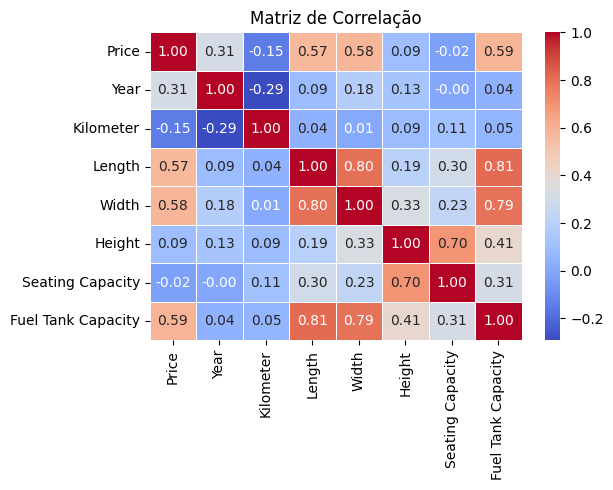

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(coor, annot=True, cmap='coolwarm', fmt = ".2f", linewidths=0.5)
plt.title('Matriz de Correlação')

plt.show()

**Correlações**
- Positivas:
  - Price x Fuel Tank Capacity: 0.58
  - Length x Wudth: 0.79

- Negativas:
  - Price x Kilometer: -0.14
  - Year x Kilometer: -0.29

- Neutras:
  - Price x Seating Capacity: -0.02
  - Year x Seating Capacity: -0.00

## 8. Codifique e exiba Gráficos de Dispersão para cada uma das variáveis numéricas em relação à variável de interesse Price.


In [ ]:
numeric_columns = df_car.select_dtypes(include=['number']).columns.tolist()
print(numeric_columns)

['Price', 'Year', 'Kilometer', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']


In [ ]:
numeric_columns.remove('Price')
print(numeric_columns)

['Year', 'Kilometer', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']


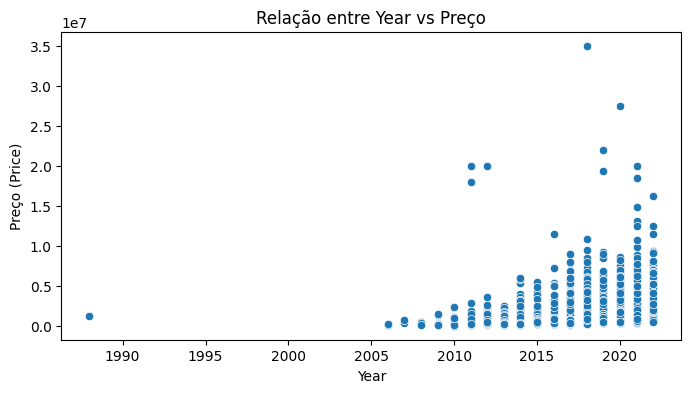

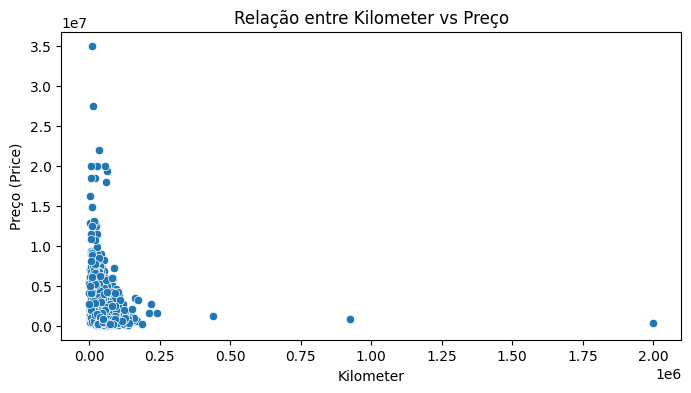

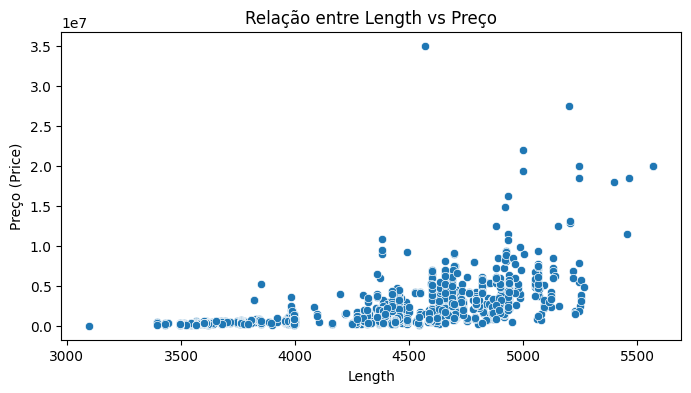

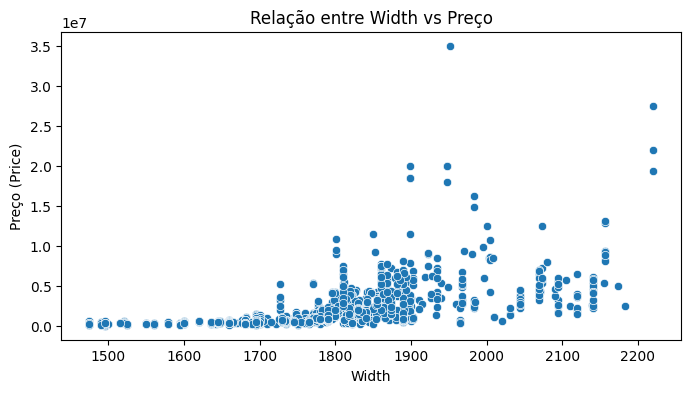

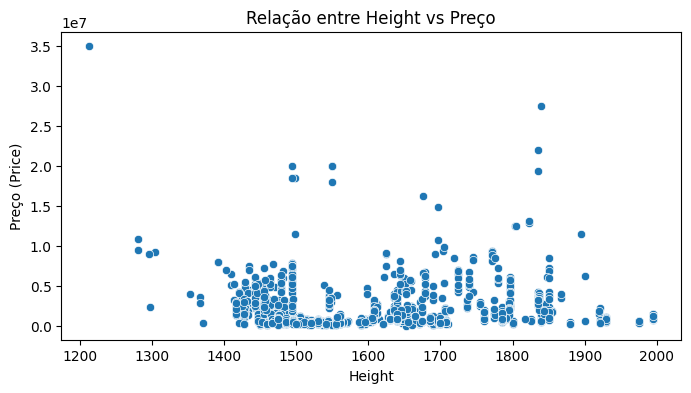

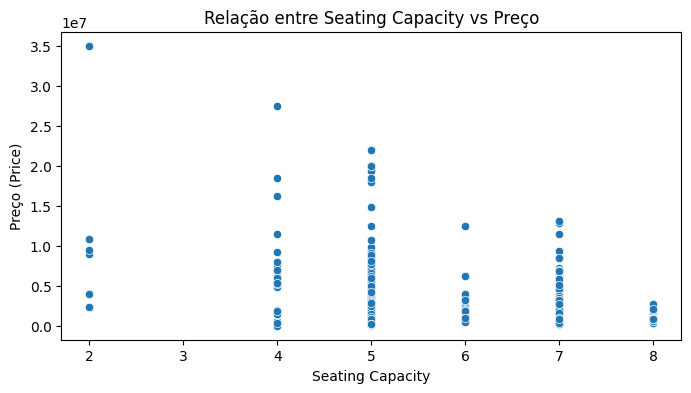

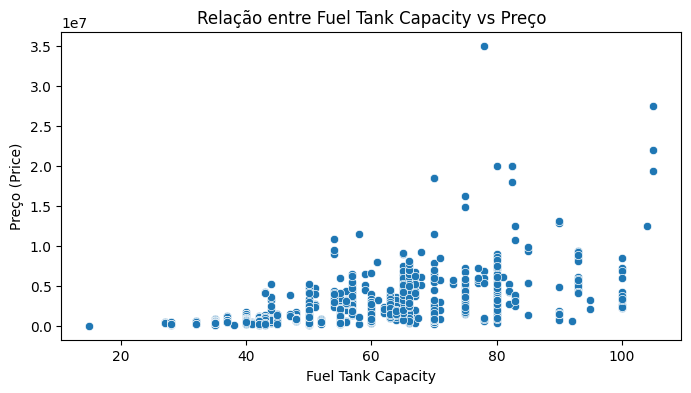

In [ ]:
for col in numeric_columns:
  plt.figure(figsize=(8,4))
  sns.scatterplot(data=df_car, x=col, y='Price')
  plt.xlabel(col)
  plt.ylabel('Preço (Price)')
  plt.title(f'Relação entre {col} vs Preço')
  plt.show()

## 9. Crie um modelo de Regressão Linear Simples, exiba a Tabela de Regressão e exiba o plot da Reta Estimada.


In [ ]:
X = sm.add_constant(df_car['Fuel Tank Capacity'])
y = df_car['Price']

In [ ]:
model = sm.OLS(y, X).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     979.6
Date:                Sun, 13 Oct 2024   Prob (F-statistic):          2.59e-173
Time:                        23:09:35   Log-Likelihood:                -29815.
No. Observations:                1874   AIC:                         5.963e+04
Df Residuals:                    1872   BIC:                         5.965e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.177e+06   1.63

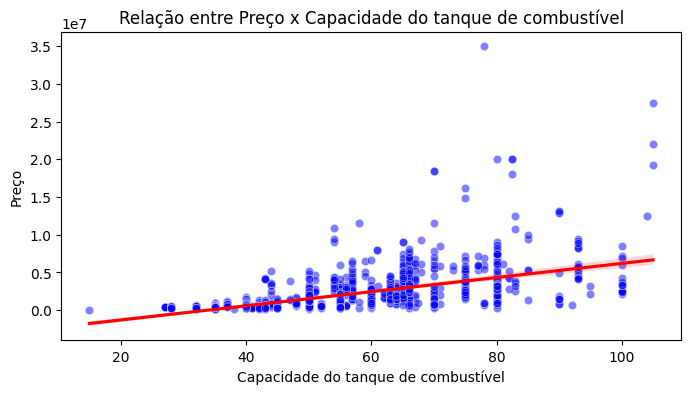

In [ ]:
# Gerando o gráfico da reta estimada
plt.figure(figsize=(8, 4))
sns.scatterplot(data= df_car, x= 'Fuel Tank Capacity', y = 'Price', color='blue', alpha=0.5)

# Gerando a regressão e a plot da reta
sns.regplot(data=df_car, x= 'Fuel Tank Capacity', y = 'Price', scatter=False, color = 'red' )

# Configurando o gráfico
plt.title('Relação entre Preço x Capacidade do tanque de combustível')
plt.xlabel('Capacidade do tanque de combustível')
plt.ylabel('Preço')

plt.show()

## 10. Codifique e exiba o gráfico dos resíduos do modelo de Regressão Simples.

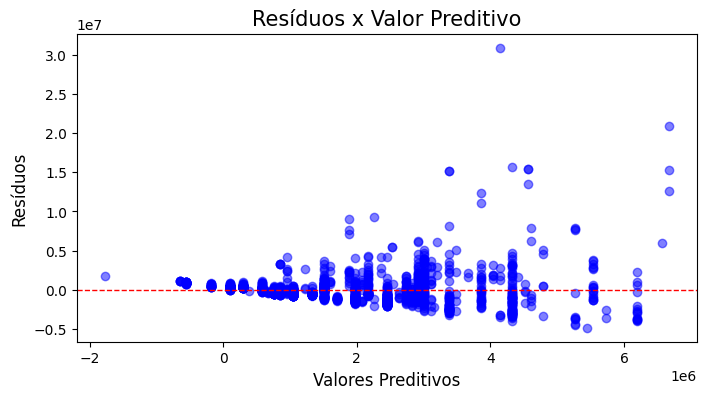

In [ ]:
# Salva o dado do resíduo
residuals = model.resid

# Calcula o valor preditivo
predicted_values = model.fittedvalues

plt.figure(figsize=(8, 4))
plt.scatter(predicted_values, residuals, color = 'blue', alpha=0.5)

# Adicionando linha
plt.axhline(y=0, color='red', linestyle='--', lw=1)

# Títulos
plt.title('Resíduos x Valor Preditivo', fontsize=15)
plt.xlabel('Valores Preditivos', fontsize=12)
plt.ylabel('Resíduos', fontsize=12)

plt.show()

## 11. Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão e exiba o gráfico dos resíduos do modelo.

In [ ]:
# Adicionar uma constante ao modelo
x = sm.add_constant(df_car[numeric_columns])
y = df_car['Price']

In [ ]:
mv_model = sm.OLS(y, x).fit()
print(mv_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     270.7
Date:                Sun, 13 Oct 2024   Prob (F-statistic):          1.49e-278
Time:                        23:13:02   Log-Likelihood:                -29553.
No. Observations:                1874   AIC:                         5.912e+04
Df Residuals:                    1866   BIC:                         5.917e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.677e+08   2.77

In [ ]:
# Calculando os valores preditivos e os resíduos
y = model.predict(X)
residuals = y - y

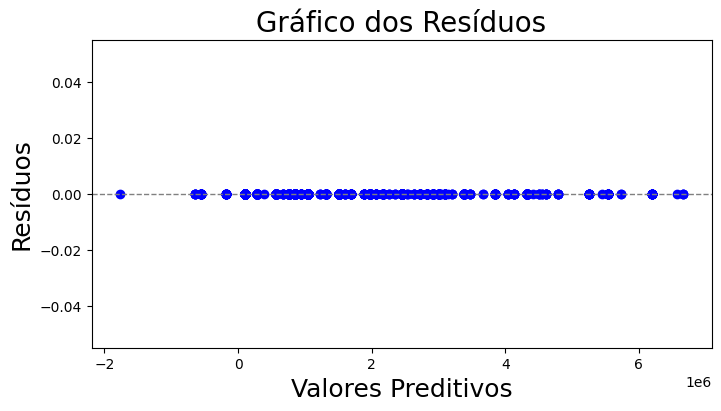

In [ ]:
# Configurando o gráfico dos resíduos
plt.figure(figsize=(8, 4))
plt.scatter(y, residuals, color='blue')
plt.axhline(y=0, color='grey', linestyle='--', lw=1)
plt.xlabel('Valores Preditivos', fontsize=18)
plt.ylabel('Resíduos', fontsize=18)
plt.title('Gráfico dos Resíduos', fontsize=20)
plt.show()